# The IMDB dataset

In [40]:
# You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
# Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
# reviews for testing, each set consisting of 50% negative and 50% positive reviews.

from tensorflow.keras.datasets import imdb
(feature_train, label_train), (feature_test, label_test) = imdb.load_data(num_words=10000)

In [41]:
# training data
feature_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [42]:
label_train[0]

1

In [43]:
#find max num from dataset
max([max(sequence) for sequence in feature_train])

9999

In [44]:
# convert numeric data in readable format just for understanding.

word_index = imdb.get_word_index()

reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join( [reverse_word_index.get(i - 3, '||') for i in feature_train[0]])

decoded_review

"|| this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert || is an amazing actor and now the same being director || father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for || and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also || to the two little boy's that played the || of norman and paul they were just brilliant children are often left out of the || list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

In [45]:
# Preparing the data:

# You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. 
# There are two ways to do that:
    
#  Pad your lists so that they all have same length, turn them into integer tensor of 
#    shape (samples, word_indices).
#  One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, 
#    turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for 
#    indices 3 and 5, which would be 1s.

# Let’s go with the latter solution to vectorize the data, which you’ll do manually for
# maximum clarity.

In [46]:
# Encoding the integer sequences into a binary matrix

In [47]:
# vectorizing the features
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

feature_train = vectorize_sequences(feature_train)
feature_test = vectorize_sequences(feature_test)

# You should also vectorize your labels, which is straightforward:
label_train = np.asarray(label_train).astype('float32')
label_test = np.asarray(label_test).astype('float32')

# Now the data is ready to be fed into a neural network.

In [48]:
# Validating your approach:
# In order to monitor during training the accuracy of the model on data it has never
# seen before, you’ll create a validation set by setting apart 10,000 samples from the
# original training data.

feature_validation = feature_train[:10000]
feature_train2 = feature_train[10000:]

label_validation = label_train[:10000]
label_train2 = label_train[10000:]

In [49]:
# The model definition

# Sigmoid-->For binary classification, Sigmoid(tanh,Softmax) & their combinations work well.
# ReLU --> most famous activation func. ReLu should be only used in hidden layers.
# Softmax --> For binary & mulit classification we use softmax
# Leaky ReLU --> It was proposed to fix the dying neurons problem of ReLu.

# Always remember ReLu should be only used in hidden layers. Sigmoid and tanh should not be used 
# as activation function for the hidden layer. This is because of the vanishing gradient problem.

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
# compiling the model

# Loss functions: (page#89 for detail):
# o  binary_crosentropy(two class clasification problem)
# o  categorical_crosentropy(multiclass classification problem)
# o  sparse_categorical_crossentropy(With integer labels, you should use it)
# o  mean_squared_error(mse)
# o  connectionist_temporal_classification(CTC)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# Configuring the optimizer, metrices and loses

# You’re passing your optimizer, loss function, and metrics as strings, which is possible because 
# rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras. Sometimes you may want 
# to configure the parameters of your optimizer or pass a custom loss function or metric function.

# Both above and below defined methods are same.


# from tensorflow.keras import optimizers
# from tensorflow.keras import losses
# from tensorflow.keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
#               loss=losses.binary_crossentropy, 
#               metrics=[metrics.binary_accuracy])

In [52]:
# Training your model
history = model.fit(feature_train2, label_train2, 
                    epochs=20, batch_size=512, 
                    validation_data=(feature_validation, label_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 140us/sample - loss: 0.5127 - accuracy: 0.7945 - val_loss: 0.3932 - val_accuracy: 0.8629
Epoch 2/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.3103 - accuracy: 0.9033 - val_loss: 0.3251 - val_accuracy: 0.8726
Epoch 3/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.2305 - accuracy: 0.9251 - val_loss: 0.2808 - val_accuracy: 0.8885
Epoch 4/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.1822 - accuracy: 0.9405 - val_loss: 0.2726 - val_accuracy: 0.8894
Epoch 5/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.1456 - accuracy: 0.9553 - val_loss: 0.2990 - val_accuracy: 0.8805
Epoch 6/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.1219 - accuracy: 0.9607 - val_loss: 0.2866 - val_accuracy: 0.8862
Epoch 7/20
15000/15000 [==========================

In [53]:
# Note that the call to model.fit() returns a History object. This object has a member
# history, which is a dictionary containing data about everything that happened
# during training. Let’s look at it:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

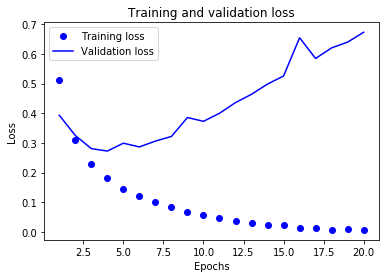

In [54]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

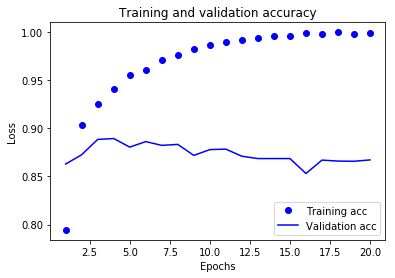

In [55]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
# o As you can see, the training loss decreases with every epoch, and the training accuracy increases 
#   with every epoch. That’s what you would expect when running gradient descent optimization. 
    
# o The quantity you’re trying to minimize should be less with every iteration. But that isn’t the case 
#   for validation loss and acc: they seem to peak at fourth epoch. This is an example of overfitting:
  
# o After the second epoch, you’re over optimizing on the training data, and you end up learning 
#   representations that are specific to the training data and don’t generalize to data outside of 
#   the training set.

# o In this case, to prevent overfitting, you could stop training after three epochs. In eneral, you 
#   can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 4.

In [57]:
# Let’s train a new network from scratch for four epochs and then evaluate it on the
# test data.

In [58]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(feature_train2, label_train2, 
                    epochs=4, batch_size=512, 
                    validation_data=(feature_validation, label_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 136us/sample - loss: 0.5253 - accuracy: 0.7747 - val_loss: 0.3897 - val_accuracy: 0.8630
Epoch 2/4
15000/15000 [==============================] - 2s 104us/sample - loss: 0.3110 - accuracy: 0.9013 - val_loss: 0.3119 - val_accuracy: 0.8832
Epoch 3/4
15000/15000 [==============================] - 2s 106us/sample - loss: 0.2243 - accuracy: 0.9294 - val_loss: 0.2802 - val_accuracy: 0.8905
Epoch 4/4
15000/15000 [==============================] - 2s 103us/sample - loss: 0.1769 - accuracy: 0.9437 - val_loss: 0.2886 - val_accuracy: 0.8855


In [60]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

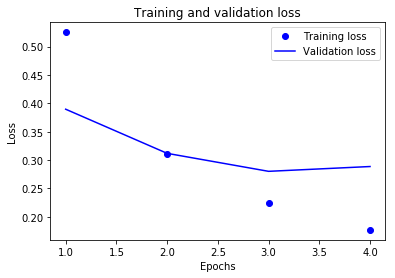

In [61]:
# Again Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

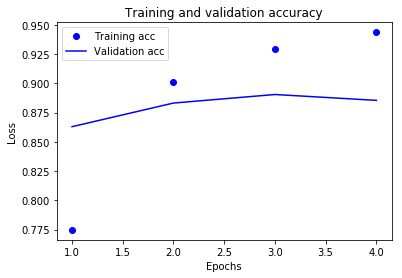

In [62]:
# Again Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
# Now, finally let's test the model using evaluate function

test_loss, test_acc  = model.evaluate(feature_test, label_test)
test_acc

25000/25000 [==============================] - 2s 94us/sample - loss: 0.3034 - accuracy: 0.8764


0.8764

In [ ]:
# This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
# approaches, you should be able to get close to 95%.

In [64]:
model.predict(feature_test)

array([[0.3133458 ],
       [0.99965847],
       [0.96486026],
       ...,
       [0.1542363 ],
       [0.2766856 ],
       [0.63362306]], dtype=float32)